In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import scipy
from scipy.interpolate import interp1d
import pandas as pd
# from tsfresh.feature_extraction import extract_features
# from tsfresh.feature_extraction.settings import ComprehensiveFCParameters, MinimalFCParameters, EfficientFCParameters
# from tsfresh.feature_extraction.settings import from_columns

In [10]:
#list the files
filelist = os.listdir("Mouse-Dynamics-Challenge/training_files/user35/") 
df_list = [pd.read_csv("Mouse-Dynamics-Challenge/training_files/user35/"+file) for file in filelist]
data = pd.concat(df_list)

In [11]:
record_timestamp = data.iloc[:,0].values
client_timestamp = data.iloc[:,1].values
button = data.iloc[:,2].values
state = data.iloc[:,3].values
x = data.iloc[:,4].values
y = data.iloc[:,5].values
rows = data.shape[0]
data.describe()

,record timestamp,client timestamp,x,y
count,98870.000000,98870.000000,98870.000000,98870.000000
mean,5699.387906,5699.399679,363.370932,345.244473
std,3982.784517,3982.819648,343.852097,282.220434
min,0.000000,0.000000,0.000000,0.000000
25%,2625.253000,2625.251000,184.000000,197.000000
50%,5499.268500,5499.324000,285.000000,331.000000
75%,7844.123750,7844.019250,465.000000,479.000000
max,18208.599000,18208.764000,65535.000000,65535.000000


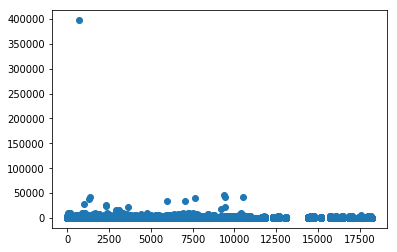

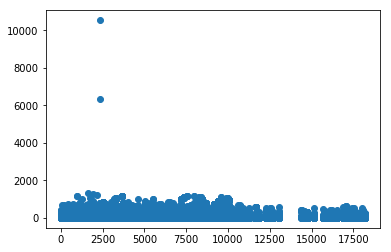

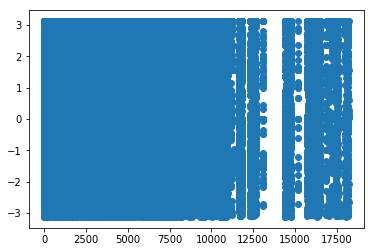

Average speed 275.059391755
Average Latitudnal Distance 363.370931526
Average Longitudnal Distance 345.24447254
Average Distance Covered 33.2261685293
Average Direction  0.18308172319


In [12]:
speed = []
l_travel = []
angle = []
for row in range(1,rows):
    distance = math.pow(x[row]-x[row-1] , 2) - math.pow(y[row]-y[row-1], 2)
    distance = math.fabs(distance) 
    distance = pow(distance , 0.5)
    l_travel.append(distance)
    if((client_timestamp[row] - client_timestamp[row-1]) != 0):
        speed.append(distance / (client_timestamp[row] - client_timestamp[row-1]))
        angle.append(math.atan2((y[row]-y[row-1]), (x[row]-x[row-1])))
l = len(speed)
d = len(l_travel)
plt.scatter(client_timestamp[1:l+1], speed)
plt.show()
plt.scatter(client_timestamp[1:d+1], l_travel)
plt.show()
plt.scatter(client_timestamp[1:l+1], angle)
plt.show()
speed = [x for x in speed if str(x) != 'nan']
np_speed = np.array(speed)
np_distance = np.array(l_travel)
np_angle = np.array(angle)
print("Average speed" , np.nanmean(np_speed))
print("Average Latitudnal Distance" , np.average(x))
print("Average Longitudnal Distance" , np.average(y))
print("Average Distance Covered" , np.average(np_distance))
print("Average Direction ", np.average(np_angle))

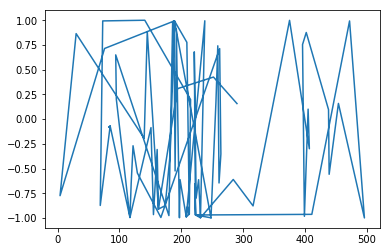

In [13]:
x = x[0:100]
y = y[0:100]
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = scipy.interpolate.interp2d(x, y, z, kind='cubic')
xnew = np.arange(-5.01, 5.01, 1e-2)
plt.plot(x, z[0, :])
plt.show()

In [14]:
click_time = []
clicks =0
time = 0
for row in range(1,rows):
    if(state[row] == "Pressed"):
        clicks = clicks+1
#         for states in range(row , rows):
#             while((state[row] != 'Released')):
#                 time = time + record_timestamp[states] 
#             click_time.apend(time)
#             row = states
#             break
# print(click_time)
print("Number of Clicks" ,clicks)

Number of Clicks 4796


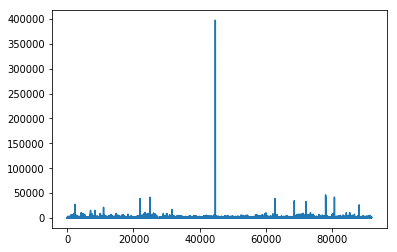

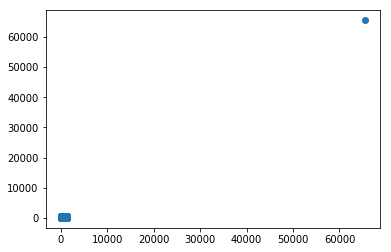

In [15]:
plt.plot(speed)
plt.show()
plt.scatter(data['x'], data['y'])
plt.show()

In [16]:
# WE CAN USE TSFRESH LIBRARY TO EXTRACT AROUND 1500 STATISTICAL FEATURES OF THE GIVEN TIMESERIES DATA
# settings_minimal = MinimalFCParameters() # only a few basic features
# X_tsfresh = extract_features(data, column_id="client timestamp")